In [41]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [42]:
(ds_train, ds_test), ds_info = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True, with_info=True)

In [43]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [44]:
train_sentences, train_labels = zip(*[(x.numpy().decode(), y.numpy()) for x, y in ds_train])
test_sentences, test_labels = zip(*[(x.numpy().decode(), y.numpy()) for x, y in ds_test])

In [45]:
len(train_sentences),len(test_sentences)

(25000, 25000)

In [46]:
print(train_sentences[0])
print("label:",train_labels[0])

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
label: 0


In [47]:
for i in range(5):
    print(f"Review {i+1}: {train_sentences[i]}")
    print(f"Label {i+1}: {'Positive' if train_labels[i] == 1 else 'Negative'}\n")


Review 1: This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
Label 1: Negative

Review 2: I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was

In [48]:
import pandas as pd

train_labels_df = pd.DataFrame(train_labels, columns=['label'])
label_counts = train_labels_df['label'].value_counts()
label_counts


,count
label,
0,12500
1,12500


In [49]:
# Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)

In [50]:
# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [51]:
# train_sequences[0]

In [52]:
# Padding sequences
max_length = 200
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [53]:
# Convert labels to numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [54]:
#Simple RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=max_length),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
history = model.fit(train_padded, train_labels, epochs=10, validation_data=(test_padded, test_labels), batch_size=128)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 404ms/step - accuracy: 0.6256 - loss: 0.5382 - val_accuracy: 0.5155 - val_loss: 0.8701
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 411ms/step - accuracy: 0.6298 - loss: 0.5286 - val_accuracy: 0.5037 - val_loss: 0.9003
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 412ms/step - accuracy: 0.6129 - loss: 0.5331 - val_accuracy: 0.5054 - val_loss: 0.9772
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 76s 384ms/step - accuracy: 0.6272 - loss: 0.5259 - val_accuracy: 0.5058 - val_loss: 1.0162
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 89s 422ms/step - accuracy: 0.6165 - loss: 0.5267 - val_accuracy: 0.5048 - val_loss: 1.0521
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 79s 403ms/step - accuracy: 0.6203 - loss: 0.5438 - val_accuracy: 0.5044 - val_loss: 1.0321
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 411ms/step - accuracy: 0.6214 - loss: 0.5302 - val_accuracy: 0.5047 - val_loss: 1.0706
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 80s 410ms/step - accuracy: 0.6220 - loss: 0

In [67]:
test_loss, test_acc = model.evaluate(test_padded, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.5047 - loss: 1.1527
Test Accuracy: 0.5045


Text(0.5, 1.0, 'Accuracy Curve')

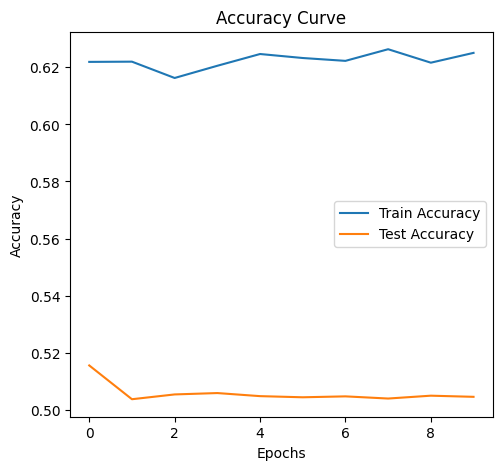

In [68]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

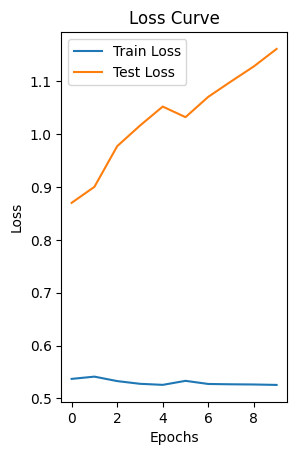

In [69]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step


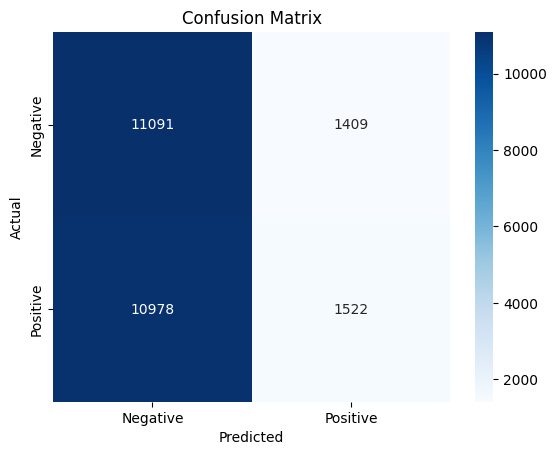

In [70]:
# Confusion Matrix
pred_labels = (model.predict(test_padded) > 0.5).astype("int32").flatten()
cm = confusion_matrix(test_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [71]:
print("\nClassification Report:\n", classification_report(test_labels, pred_labels))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.89      0.64     12500
           1       0.52      0.12      0.20     12500

    accuracy                           0.50     25000
   macro avg       0.51      0.50      0.42     25000
weighted avg       0.51      0.50      0.42     25000



In [72]:
def predict_sample(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded)[0, 0]
    print(f"Review: {text}\nPredicted Sentiment: {'Positive' if prediction > 0.5 else 'Negative'} ({prediction:.4f})\n")

In [82]:



predict_sample("This movie was good. I liked it. the plot was unimaginable and thrilling, acters were nice, overall good movie")
predict_sample("Worst movie ever. Don't waste your time.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Review: This movie was good. I liked it. the plot was unimaginable and thrilling, acters were nice, overall good movie
Predicted Sentiment: Negative (0.4932)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Review: Worst movie ever. Don't waste your time.
Predicted Sentiment: Negative (0.4932)



In [79]:
# model.save('simple_rnn_imdb.h5')